In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
ch = pd.read_csv("/Users/diogolepri/Desktop/Autism-Spectrum-Disorder/CHILDREN_asd/csv_result-Autism-Child-Data.csv", na_values=['?'])

In [6]:
#Children
ch.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [ ]:
# Number of tuples and fields
print("Children      :",ch.shape)

In [7]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               292 non-null    int64  
 1   A1_Score         292 non-null    int64  
 2   A2_Score         292 non-null    int64  
 3   A3_Score         292 non-null    int64  
 4   A4_Score         292 non-null    int64  
 5   A5_Score         292 non-null    int64  
 6   A6_Score         292 non-null    int64  
 7   A7_Score         292 non-null    int64  
 8   A8_Score         292 non-null    int64  
 9   A9_Score         292 non-null    int64  
 10  A10_Score        292 non-null    int64  
 11  age              288 non-null    float64
 12  gender           292 non-null    object 
 13  ethnicity        249 non-null    object 
 14  jundice          292 non-null    object 
 15  austim           292 non-null    object 
 16  contry_of_res    292 non-null    object 
 17  used_app_before 

In [8]:
ch.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [9]:
#Total number of missing values in each dataset
print("Total no. of missing values in Children's dataset     : ",ch.isnull().sum().sum())

Total no. of missing values in Children's dataset     :  90


In [10]:
#Adults
ch.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

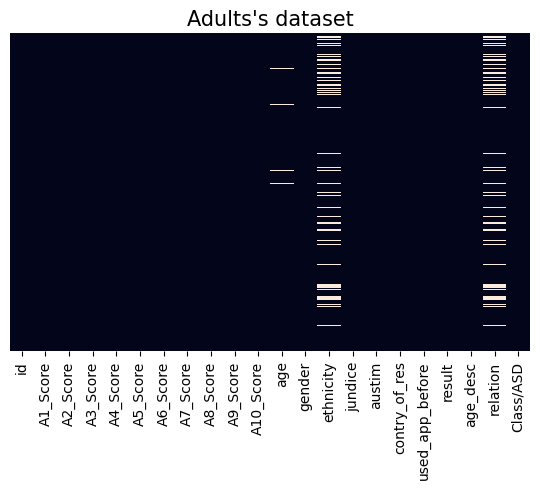

In [11]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap_adu.pdf', transparent=True, dpi=300)

In [12]:
#ASD or Not
print("\nNo of adults diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of adults not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))


No of adults diagonised with ASD =  141
No of adults not diagonised with ASD =  151


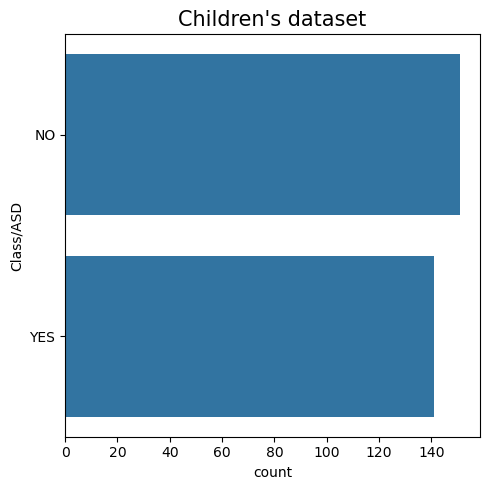

In [13]:
# #Data distribution
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(ch['Class/ASD'],ax=ax)
ax.set_title("Children's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('distribution_ch.pdf', transparent=True, dpi=300)

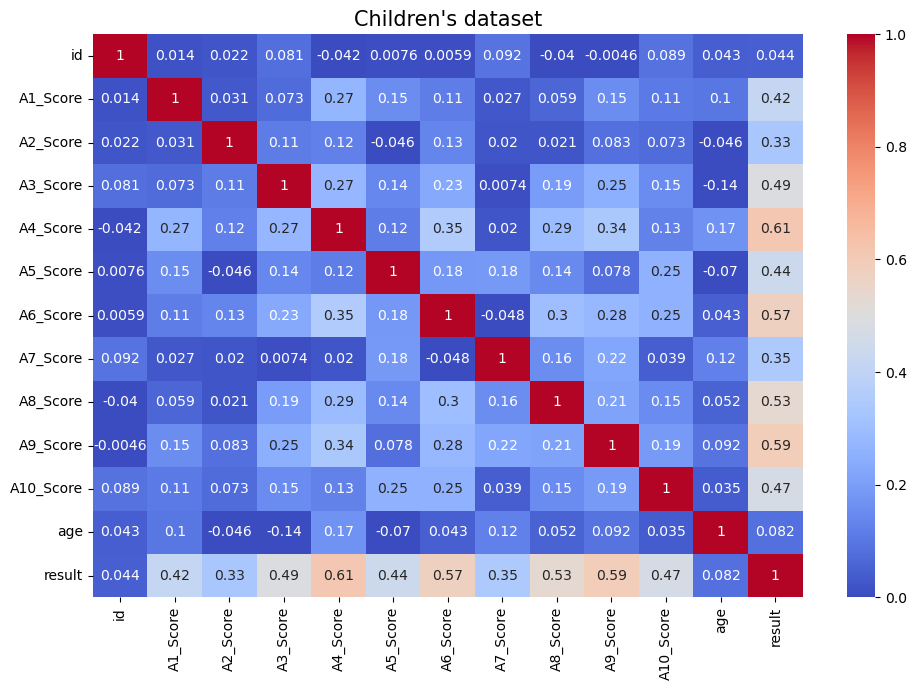

In [16]:
#Correlation
fig, ax = plt.subplots(figsize=(10,7))
ch_numeric = ch.select_dtypes(include=['number'])
sns.heatmap(ch_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax)
ax.set_title("Children's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('correlation_adu.pdf', transparent=True, dpi=300)

In [18]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

ch.ethnicity = imputer_mode.fit_transform(ch.ethnicity.values.reshape(-1,1))[:,0]
ch.relation = imputer_mode.fit_transform(ch.relation.values.reshape(-1,1))[:,0]

#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='mean')
ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]

In [23]:
print("After imputing,\nNo of missing values in Children's dataset      = ",ch.isnull().sum().sum())

After imputing,
No of missing values in Children's dataset      =  0


In [22]:
#Since age of toddlers are represented in months, age(in years) of adults is converted to age in months.
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)

ch['Age_Mons'] = ch['Age_Mons']*12

In [25]:
#Making classes of categorical variables same for all datasets
ch['ethnicity'] = ch['ethnicity'].replace('Others','others')

In [26]:
ch.to_csv('preprocessed_children.csv', index=False)